# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
import timeit
import time
import tensorflow as tf
from joblib import dump, load
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# $ \frac{a}{c} \le 1$

## No Boosting

In [2]:
d1_le1 = np.load("Test_2/data/2_RN_eqn_ac_le1.npy")
d1_le1.shape

(57302, 4)

In [3]:
def poly_svm(train_data):
    degrees = [1,2,3,4]
    times = []
    regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(train_data[:,:-1], train_data[:,-1])
        t1 = time.time()
        times.append(t1-t0)
        regs.append(reg)
        print("Done degree {}".format(degree))
    return times, regs

In [4]:
times, regs = poly_svm(d1_le1)

# saving models
i = 1
for reg in regs:
    dump(reg, 'results/d2/models/le/no_boost/le_poly_degree_{}.joblib'.format(i))
    i += 1
np.save("results/d2/times/le/no_boost/d2_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [5]:
def rbf_svm(train_data):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(train_data[:,:-1], train_data[:,-1])
    t1 = time.time()
    return t1-t0, reg

In [6]:
times, regs = rbf_svm(d1_le1)

# saving models
dump(regs, 'results/d2/models/le/no_boost/le_rbf.joblib')
np.save("results/d2/times/le/no_boost/d2_times_rbf.npy", times)

In [3]:
def NN(X_train, y_train):
    #create model
    model = Sequential()

    #get number of columns in training data
    n_cols = X_train.shape[1]

    #add model layers
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='adam', loss='mse')
    early_stopping_monitor = EarlyStopping(patience=10)

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping_monitor])

    return history, model

history, model = NN(d1_le1[:,:-1], d1_le1[:,-1])
model.save("results/d2/models/le/no_boost/le_nn.h5")

Epoch 1/100


2022-02-20 11:26:23.091831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 11:26:23.098427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-02-20 11:26:23.098444: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-02-20 11:26:23.099176: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

1433/1433 [==============================] - 2s 1ms/step - loss: 0.0504 - val_loss: 0.0037
Epoch 2/100
1433/1433 [==============================] - 1s 926us/step - loss: 0.0033 - val_loss: 0.0023
Epoch 3/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 4/100
1433/1433 [==============================] - 1s 922us/step - loss: 9.7792e-04 - val_loss: 6.3460e-04
Epoch 5/100
1433/1433 [==============================] - 1s 995us/step - loss: 6.0524e-04 - val_loss: 4.4321e-04
Epoch 6/100
1433/1433 [==============================] - 1s 935us/step - loss: 4.3766e-04 - val_loss: 3.4627e-04
Epoch 7/100
1433/1433 [==============================] - 1s 942us/step - loss: 3.4595e-04 - val_loss: 2.5985e-04
Epoch 8/100
1433/1433 [==============================] - 1s 976us/step - loss: 2.9323e-04 - val_loss: 2.2552e-04
Epoch 9/100
1433/1433 [==============================] - 2s 1ms/step - loss: 2.6532e-04 - val_loss: 2.7584e-04
Epoch 10/100
1433/1433 [=

Epoch 74/100
1433/1433 [==============================] - 2s 1ms/step - loss: 1.2748e-04 - val_loss: 1.2927e-04
Epoch 75/100
1433/1433 [==============================] - 2s 1ms/step - loss: 1.2519e-04 - val_loss: 1.3900e-04
Epoch 76/100
1433/1433 [==============================] - 1s 993us/step - loss: 1.2305e-04 - val_loss: 1.9808e-04
Epoch 77/100
1433/1433 [==============================] - 1s 984us/step - loss: 1.2324e-04 - val_loss: 1.1143e-04
Epoch 78/100
1433/1433 [==============================] - 1s 915us/step - loss: 1.2470e-04 - val_loss: 8.8812e-05
Epoch 79/100
1433/1433 [==============================] - 2s 1ms/step - loss: 1.2119e-04 - val_loss: 9.6858e-05
Epoch 80/100
1433/1433 [==============================] - 2s 1ms/step - loss: 1.2049e-04 - val_loss: 1.2016e-04
Epoch 81/100
1433/1433 [==============================] - 2s 2ms/step - loss: 1.1546e-04 - val_loss: 9.0272e-05
Epoch 82/100
1433/1433 [==============================] - 2s 1ms/step - loss: 1.1817e-04 - val_los

## Boosting

In [5]:
data = []
for row in d1_le1:
    if (row[2] > 1.5 and row[2] < 1.65):
        data.append(np.delete(row, 2))
M_data = np.array(data)

In [7]:
def poly_svm_boost(train_data, M_train_data, data_type):
    degrees = [1,2,3,4]
    times = []
    M_regs = []
    g_regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
        M = reg.predict(train_data[:,:2])
        train_data[:,-1] = train_data[:,-1]/M
        reg_g = SVR(kernel="poly", degree = degree)
        if data_type == 'le':
            reg_g.fit(train_data[:,1:-1], train_data[:,-1])
        elif data_type == 'g':
            reg_g.fit(train_data[:,:-1], train_data[:,-1])
        else:
            raise Exception("Invalid data type")
        t1 = time.time()
        times.append(t1-t0)
        M_regs.append(reg)
        g_regs.append(reg_g)
        print("Done degree {}".format(degree))
    
    return times, M_regs, g_regs

In [8]:
# Poly SVM
times, M_regs, g_regs = poly_svm_boost(d1_le1, M_data, "le")

# saving models
for i in range(4):
    dump(M_regs[i], 'results/d2/models/le/boost/le_M_poly_degree_{}.joblib'.format(i))
    dump(g_regs[i], 'results/d2/models/le/boost/le_g_poly_degree_{}.joblib'.format(i))

np.save("results/d2/times/le/boost/d1_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [9]:
def rbf_svm_boost(train_data, M_train_data, data_type):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
    M = reg.predict(train_data[:,:2])
    train_data[:,-1] = train_data[:,-1]/M
    reg_g = SVR(kernel="rbf")
    if data_type == 'le':
        reg_g.fit(train_data[:,1:-1], train_data[:,-1])
    elif data_type == 'g':
        reg_g.fit(train_data[:,:-1], train_data[:,-1])
    else:
        raise Exception("Invalid data type")
    t1 = time.time()
    return t1-t0, reg, reg_g

In [10]:
times, M_regs, g_regs = rbf_svm_boost(d1_le1, M_data, "le")

# saving models
dump(M_regs, 'results/d2/models/le/boost/le_M_rbf.joblib')
dump(g_regs, 'results/d2/models/le/boost/le_g_rbf.joblib')
np.save("results/d2/times/le/boost/d2_times_rbf.npy", times)

In [6]:
def nn_boost(train_data, M_train_data, data_type):
    t0 = time.time()
    _, reg = NN(M_train_data[:,:-1], M_train_data[:,-1])
    M = reg.predict(train_data[:,:2])
    train_data[:,-1] = train_data[:,-1]/np.squeeze(M, axis=-1)
    if data_type == 'le':
        _, reg_g = NN(train_data[:,1:-1], train_data[:,-1])
    elif data_type == 'g':
        _, reg_g = NN(train_data[:,:-1], train_data[:,-1])
    else:
        raise Exception("Invalid data type")
    t1 = time.time()
    return t1-t0, reg, reg_g

times, M_regs, g_regs = nn_boost(d1_le1, M_data, "le")
M_regs.save("results/d2/models/le/boost/le_M_nn.h5")
g_regs.save("results/d2/models/le/boost/le_g_nn.h5")
np.save("results/d2/times/le/boost/d2_times_nn.npy", times)

Epoch 1/100
86/86 [==============================] - 0s 2ms/step - loss: 0.8592 - val_loss: 0.2586
Epoch 2/100
86/86 [==============================] - 0s 1ms/step - loss: 0.1312 - val_loss: 0.0890
Epoch 3/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0838 - val_loss: 0.0702
Epoch 4/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0644 - val_loss: 0.0522
Epoch 5/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0453 - val_loss: 0.0340
Epoch 6/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0261 - val_loss: 0.0172
Epoch 7/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0096
Epoch 8/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0075
Epoch 9/100
86/86 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 10/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 11/

Epoch 3/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 4/100
1433/1433 [==============================] - 1s 991us/step - loss: 0.0035 - val_loss: 0.0032
Epoch 5/100
1433/1433 [==============================] - 1s 960us/step - loss: 0.0033 - val_loss: 0.0031
Epoch 6/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 7/100
1433/1433 [==============================] - 1s 1ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 8/100
1433/1433 [==============================] - 1s 1ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 10/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 11/100
1433/1433 [==============================] - 2s 1ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 12/100
1433/1433 [==============================] - 2s 1ms/st

# $ \frac{a}{c} > 1$

## No Boosting

In [7]:
d1_le1 = np.load("Test_2/data/2_RN_eqn_ac_g1.npy")
d1_le1.shape

(49495, 4)

In [12]:
def poly_svm(train_data):
    degrees = [1,2,3,4]
    times = []
    regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(train_data[:,:-1], train_data[:,-1])
        t1 = time.time()
        times.append(t1-t0)
        regs.append(reg)
        print("Done degree {}".format(degree))
    return times, regs

In [13]:
times, regs = poly_svm(d1_le1)

# saving models
i = 1
for reg in regs:
    dump(reg, 'results/d2/models/g/no_boost/g_poly_degree_{}.joblib'.format(i))
    i += 1
np.save("results/d2/times/g/no_boost/d2_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [14]:
def rbf_svm(train_data):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(train_data[:,:-1], train_data[:,-1])
    t1 = time.time()
    return t1-t0, reg

In [15]:
times, regs = rbf_svm(d1_le1)

# saving models
dump(regs, 'results/d2/models/g/no_boost/g_rbf.joblib')
np.save("results/d2/times/g/no_boost/d2_times_rbf.npy", times)

In [8]:
def NN(X_train, y_train):
    #create model
    model = Sequential()

    #get number of columns in training data
    n_cols = X_train.shape[1]

    #add model layers
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='adam', loss='mse')
    early_stopping_monitor = EarlyStopping(patience=10)

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping_monitor])

    return history, model

history, model = NN(d1_le1[:,:-1], d1_le1[:,-1])
model.save("results/d2/models/g/no_boost/le_nn.h5")

Epoch 1/100
1238/1238 [==============================] - 2s 1ms/step - loss: 0.0070 - val_loss: 4.6624e-04
Epoch 2/100
1238/1238 [==============================] - 1s 966us/step - loss: 4.1860e-04 - val_loss: 3.1607e-04
Epoch 3/100
1238/1238 [==============================] - 1s 979us/step - loss: 2.6729e-04 - val_loss: 1.8492e-04
Epoch 4/100
1238/1238 [==============================] - 1s 1ms/step - loss: 1.5742e-04 - val_loss: 1.2418e-04
Epoch 5/100
1238/1238 [==============================] - 1s 965us/step - loss: 1.1160e-04 - val_loss: 1.3593e-04
Epoch 6/100
1238/1238 [==============================] - 1s 952us/step - loss: 9.3574e-05 - val_loss: 6.9428e-05
Epoch 7/100
1238/1238 [==============================] - 2s 1ms/step - loss: 8.6660e-05 - val_loss: 9.4646e-05
Epoch 8/100
1238/1238 [==============================] - 1s 946us/step - loss: 8.0098e-05 - val_loss: 6.9085e-05
Epoch 9/100
1238/1238 [==============================] - 1s 939us/step - loss: 7.2192e-05 - val_loss: 5.22

Epoch 74/100
1238/1238 [==============================] - 1s 1ms/step - loss: 2.1287e-05 - val_loss: 1.8847e-05
Epoch 75/100
1238/1238 [==============================] - 1s 1ms/step - loss: 2.2004e-05 - val_loss: 1.4179e-05
Epoch 76/100
1238/1238 [==============================] - 1s 1ms/step - loss: 2.1908e-05 - val_loss: 2.4253e-05
Epoch 77/100
1238/1238 [==============================] - 1s 1ms/step - loss: 2.1359e-05 - val_loss: 1.4610e-05
Epoch 78/100
1238/1238 [==============================] - 1s 1ms/step - loss: 2.1378e-05 - val_loss: 2.2016e-05
Epoch 79/100
1238/1238 [==============================] - 1s 1ms/step - loss: 2.1064e-05 - val_loss: 1.7357e-05
Epoch 80/100
1238/1238 [==============================] - 1s 1ms/step - loss: 2.1587e-05 - val_loss: 1.7298e-05
Epoch 81/100
1238/1238 [==============================] - 1s 1ms/step - loss: 2.0845e-05 - val_loss: 2.9318e-05
Epoch 82/100
1238/1238 [==============================] - 1s 999us/step - loss: 2.0801e-05 - val_loss: 2

## Boosting

In [16]:
def poly_svm_boost(train_data, M_train_data, data_type):
    degrees = [1,2,3,4]
    times = []
    M_regs = []
    g_regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
        M = reg.predict(train_data[:,:2])
        train_data[:,-1] = train_data[:,-1]/M
        reg_g = SVR(kernel="poly", degree = degree)
        if data_type == 'le':
            reg_g.fit(train_data[:,1:-1], train_data[:,-1])
        elif data_type == 'g':
            reg_g.fit(train_data[:,:-1], train_data[:,-1])
        else:
            raise Exception("Invalid data type")
        t1 = time.time()
        times.append(t1-t0)
        M_regs.append(reg)
        g_regs.append(reg_g)
        print("Done degree {}".format(degree))
    
    return times, M_regs, g_regs

In [17]:
data = []
for row in d1_le1:
    if (row[2] > 1.5 and row[2] < 1.65):
        data.append(np.delete(row, 2))
M_data = np.array(data)

# Poly SVM
times, M_regs, g_regs = poly_svm_boost(d1_le1, M_data, "g")

# saving models
for i in range(4):
    dump(M_regs[i], 'results/d2/models/g/boost/g_M_poly_degree_{}.joblib'.format(i))
    dump(g_regs[i], 'results/d2/models/g/boost/g_g_poly_degree_{}.joblib'.format(i))

np.save("results/d2/times/g/boost/d2_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [18]:
def rbf_svm_boost(train_data, M_train_data, data_type):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
    M = reg.predict(train_data[:,:2])
    train_data[:,-1] = train_data[:,-1]/M
    reg_g = SVR(kernel="rbf")
    if data_type == 'le':
        reg_g.fit(train_data[:,1:-1], train_data[:,-1])
    elif data_type == 'g':
        reg_g.fit(train_data[:,:-1], train_data[:,-1])
    else:
        raise Exception("Invalid data type")
    t1 = time.time()
    return t1-t0, reg, reg_g

In [19]:
times, M_regs, g_regs = rbf_svm_boost(d1_le1, M_data, "g")

# saving models
dump(M_regs, 'results/d2/models/g/boost/g_M_rbf.joblib')
dump(g_regs, 'results/d2/models/g/boost/g_g_rbf.joblib')
np.save("results/d2/times/g/boost/d2_times_rbf.npy", times)

# Results

## $0 \le \frac{a}{c} \le 2$

In [2]:
# Loading test dataset
df = pd.read_csv("../data/3_datasets_new/test/2_RN_eqn_TEST.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Testing
MSE = []
for i in range(1, 5):
    reg = load('results/d2/models/all/d2_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE.append(mse)
    
reg = load('results/d2/models/all/d2_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE.append(mse)

## $ \frac{a}{c} \le 1$

### No Boost

In [3]:
d_test = np.load("Test_2/data/test/d2_test_le.npy")

# Testing
MSE_le_nb = []
for i in range(1, 5):
    reg = load('results/d2/models/le/no_boost/le_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_nb.append(mse)
    
reg = load('results/d2/models/le/no_boost/le_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_nb.append(mse)

### Boost

In [4]:
# Testing
MSE_le_b = []
for i in range(4):
    reg = load('results/d2/models/le/boost/le_M_poly_degree_{}.joblib'.format(i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d2/models/le/boost/le_g_poly_degree_{}.joblib'.format(i))
    g = reg.predict(d_test[:,1:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_b.append(mse)
    
reg = load('results/d2/models/le/boost/le_M_rbf.joblib')
M = reg.predict(d_test[:,:2])
reg = load('results/d2/models/le/boost/le_g_rbf.joblib')
g = reg.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b.append(mse)    

## $ \frac{a}{c} > 1$

### No Boost

In [5]:
d_test = np.load("Test_2/data/test/d2_test_g.npy")

# Testing
MSE_g_nb = []
for i in range(1, 5):
    reg = load('results/d2/models/g/no_boost/g_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_nb.append(mse)
    
reg = load('results/d2/models/g/no_boost/g_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_nb.append(mse)

### Boost

In [6]:
# Testing
MSE_g_b = []
for i in range(4):
    reg = load('results/d2/models/g/boost/g_M_poly_degree_{}.joblib'.format(i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d2/models/g/boost/g_g_poly_degree_{}.joblib'.format(i))
    g = reg.predict(d_test[:,:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_b.append(mse)
    
reg = load('results/d2/models/g/boost/g_M_rbf.joblib')
M = reg.predict(d_test[:,:2])
reg = load('results/d2/models/g/boost/g_g_rbf.joblib')
g = reg.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b.append(mse)    

## Plot

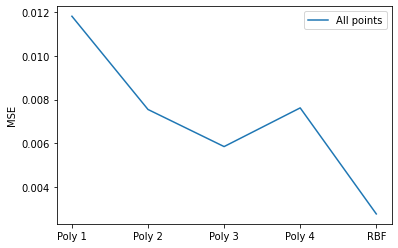

In [35]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE, label="All points")
plt.ylabel("MSE")
plt.legend()

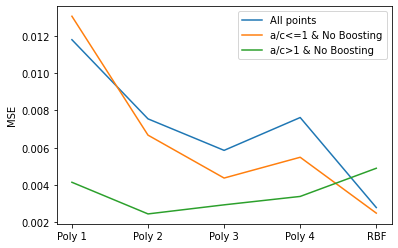

In [36]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le_nb, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_nb, label="a/c>1 & No Boosting")
plt.ylabel("MSE")
plt.legend()

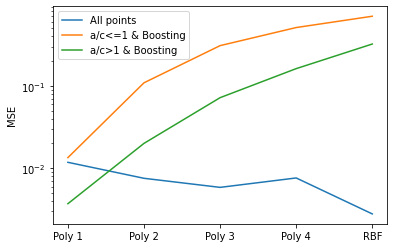

In [37]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le_b, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()

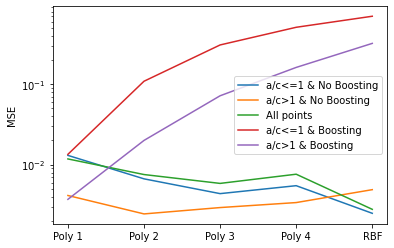

In [7]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF"]
plt.plot(algos, MSE_le_nb, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_nb, label="a/c>1 & No Boosting")
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le_b, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()